In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanvipenumudy","key":"487bfae60e4b65e36e1a308cf7412e23"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 65.1MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 29.0MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 10.3MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 61.4MB/s]


In [11]:
!ls

data_description.txt  sample_data	     test.csv
kaggle.json	      sample_submission.csv  train.csv


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [532]:
data = pd.read_csv("train.csv")

In [533]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [534]:
data.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]>

In [535]:
data = data.sample(frac=1).reset_index(drop=True)

In [536]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1011,50,RL,115.0,21286,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1.5Fin,5,5,1948,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,720,720,GasA,...,Y,SBrkr,720,551,0,1271,0,0,2,0,4,1,TA,7,Typ,1,Gd,Attchd,1948.0,Unf,1,312,TA,TA,Y,0,0,108,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,135000
1,1296,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,BrkFace,168.0,TA,TA,CBlock,TA,TA,Av,BLQ,1016,Unf,0,36,1052,GasA,...,Y,SBrkr,1052,0,0,1052,1,0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1968.0,RFn,1,288,TA,TA,Y,356,0,0,0,0,0,NaN,GdWo,NaN,0,11,2006,WD,Normal,138500
2,46,120,RL,61.0,7658,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,412.0,Ex,TA,PConc,Ex,TA,No,GLQ,456,Unf,0,1296,1752,GasA,...,Y,SBrkr,1752,0,0,1752,1,0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2005.0,RFn,2,576,TA,TA,Y,196,82,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,319900
3,1172,20,RL,76.0,9120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,662,Unf,0,599,1261,GasA,...,Y,SBrkr,1261,0,0,1261,1,0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1958.0,RFn,2,433,TA,TA,Y,0,0,0,0,288,0,NaN,NaN,Shed,1400,11,2008,WD,Normal,163000
4,921,60,RL,70.0,8462,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,1994,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,105.0,Gd,Gd,PConc,Gd,Gd,No,GLQ,814,Unf,0,114,928,GasA,...,Y,SBrkr,936,785,0,1721,0,1,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1994.0,RFn,2,471,TA,TA,Y,300,87,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,201000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1136,30,RM,60.0,6180,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1Story,6,5,1926,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,960,960,GasA,...,N,SBrkr,986,0,0,986,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1926.0,Unf,1,180,TA,TA,Y,0,128,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,102000
1456,1168,60,RL,58.0,10852,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,786,Unf,0,173,959,GasA,...,Y,SBrkr,959,712,0,1671,1,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2000.0,Fin,2,472,TA,TA,Y,0,38,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,173000
1457,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,...,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1458,981,85,RL,NaN,12122,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,SFoyer,7,9,1961,2007,Gable,CompShg,CemntBd,CmentBd,Stone,210.0,Ex,TA,CBlock,TA,TA,Av,ALQ,867,Unf,0,77,944,GasA,

In [537]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [538]:
print(data['Alley'].isna().sum())
print(data['FireplaceQu'].isna().sum())
print(data['PoolQC'].isna().sum())
print(data['Fence'].isna().sum())
print(data['MiscFeature'].isna().sum())

1369
690
1453
1179
1406


In [539]:
data.shape

(1460, 81)

In [540]:
#data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace=True) 

In [541]:
#data.drop(['LotFrontage'], axis=1, inplace=True)

In [542]:
data.drop(['Id'], axis=1, inplace=True)

In [543]:
data.shape

(1460, 80)

In [544]:
# Imputing Missing Values
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [545]:
X = pd.DataFrame(data)
data = DataFrameImputer().fit_transform(X)

In [546]:
data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [547]:
LE = LabelEncoder()
CateList = data.select_dtypes(exclude="int64").columns
print(CateList)

Index(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [548]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,50,RL,115.0,21286,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1.5Fin,5,5,1948,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,720,720,GasA,TA,Y,SBrkr,720,551,0,1271,0,0,2,0,4,1,TA,7,Typ,1,Gd,Attchd,1948.0,Unf,1,312,TA,TA,Y,0,0,108,0,0,0,Gd,MnPrv,Shed,0,8,2008,WD,Normal,135000
1,20,RL,70.0,8400,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,BrkFace,168.0,TA,TA,CBlock,TA,TA,Av,BLQ,1016,Unf,0,36,1052,GasA,Gd,Y,SBrkr,1052,0,0,1052,1,0,1,1,3,1,TA,5,Typ,0,Gd,Attchd,1968.0,RFn,1,288,TA,TA,Y,356,0,0,0,0,0,Gd,GdWo,Shed,0,11,2006,WD,Normal,138500
2,120,RL,61.0,7658,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,412.0,Ex,TA,PConc,Ex,TA,No,GLQ,456,Unf,0,1296,1752,GasA,Ex,Y,SBrkr,1752,0,0,1752,1,0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2005.0,RFn,2,576,TA,TA,Y,196,82,0,0,0,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,319900
3,20,RL,76.0,9120,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,662,Unf,0,599,1261,GasA,Ex,Y,SBrkr,1261,0,0,1261,1,0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1958.0,RFn,2,433,TA,TA,Y,0,0,0,0,288,0,Gd,MnPrv,Shed,1400,11,2008,WD,Normal,163000
4,60,RL,70.0,8462,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,1994,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,105.0,Gd,Gd,PConc,Gd,Gd,No,GLQ,814,Unf,0,114,928,GasA,Ex,Y,SBrkr,936,785,0,1721,0,1,2,1,3,1,Gd,7,Typ,0,Gd,Attchd,1994.0,RFn,2,471,TA,TA,Y,300,87,0,0,0,0,Gd,MnPrv,Shed,0,7,2007,WD,Normal,201000


In [549]:
for i in CateList:
    data[i] = LE.fit_transform(data[i])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,50,3,86,21286,1,0,3,3,0,4,0,19,2,2,0,0,5,5,1948,1950,1,1,13,14,2,0,3,4,1,3,3,3,5,0,5,0,720,720,1,4,1,4,720,551,0,1271,0,0,2,0,4,1,3,7,6,1,2,1,34,2,1,312,4,4,2,0,0,108,0,0,0,2,2,2,0,8,2008,8,4,135000
1,20,3,41,8400,1,0,3,3,0,4,0,12,1,2,0,2,5,5,1968,1968,3,1,6,6,1,111,3,4,1,3,3,0,1,1016,5,0,36,1052,1,2,1,4,1052,0,0,1052,1,0,1,1,3,1,3,5,6,0,2,1,54,1,1,288,4,4,2,356,0,0,0,0,0,2,1,2,0,11,2006,8,4,138500
2,120,3,32,7658,1,0,3,3,0,4,0,16,2,2,4,2,9,5,2005,2005,3,1,8,8,1,244,0,4,2,0,3,3,2,456,5,0,1296,1752,1,0,1,4,1752,0,0,1752,1,0,2,0,2,1,0,6,6,1,2,1,92,1,2,576,4,4,2,196,82,0,0,0,0,2,2,2,0,2,2010,8,4,319900
3,20,3,48,9120,1,0,3,3,0,4,0,12,2,2,0,2,6,6,1958,1958,3,1,8,8,2,0,3,4,1,3,3,3,0,662,5,0,599,1261,1,0,1,4,1261,0,0,1261,1,0,1,0,3,1,3,6,6,1,4,1,44,1,2,433,4,4,2,0,0,0,0,288,0,2,2,2,1400,11,2008,8,4,163000
4,60,3,41,8462,1,0,0,3,0,4,0,20,2,2,0,5,6,5,1994,1994,1,1,6,6,1,62,2,2,2,2,1,3,2,814,5,0,114,928,1,0,1,4,936,785,0,1721,0,1,2,1,3,1,2,7,6,0,2,1,81,1,2,471,4,4,2,300,87,0,0,0,0,2,2,2,0,7,2007,8,4,201000


In [550]:
#from sklearn.preprocessing import StandardScaler
df = data.iloc[:,:-1]
mm = MinMaxScaler()
df[:]= mm.fit_transform(df[:])

In [551]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.176471,0.75,0.781818,0.093417,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.791667,0.250,0.285714,0.0,0.000000,0.444444,0.500,0.550725,0.000000,0.2,0.142857,0.928571,0.933333,0.666667,0.000000,1.000000,1.0,0.2,1.000000,1.000000,1.0,1.0,0.000000,1.0,0.0,0.308219,0.117840,0.2,1.0,1.0,1.0,0.088573,0.266828,0.0,0.176526,0.000000,0.0,0.666667,0.0,0.500,0.333333,1.000000,0.416667,1.0,0.333333,0.5,0.2,0.350515,1.0,0.25,0.220028,1.0,1.0,1.0,0.000000,0.000000,0.195652,0.0,0.0,0.0,1.0,0.666667,0.666667,0.000000,0.636364,0.50,1.0,0.8
1,0.000000,0.75,0.372727,0.033186,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.500000,0.125,0.285714,0.0,0.285714,0.444444,0.500,0.695652,0.300000,0.6,0.142857,0.428571,0.400000,0.333333,0.339450,1.000000,1.0,0.2,1.000000,1.000000,0.0,0.2,0.180014,1.0,0.0,0.015411,0.172177,0.2,0.5,1.0,1.0,0.164754,0.000000,0.0,0.135268,0.333333,0.0,0.333333,0.5,0.375,0.333333,1.000000,0.250000,1.0,0.000000,0.5,0.2,0.556701,0.5,0.25,0.203103,1.0,1.0,1.0,0.415403,0.000000,0.000000,0.0,0.0,0.0,1.0,0.333333,0.666667,0.000000,0.909091,0.00,1.0,0.8
2,0.588235,0.75,0.290909,0.029718,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.666667,0.250,0.285714,1.0,0.285714,0.888889,0.500,0.963768,0.916667,0.6,0.142857,0.571429,0.533333,0.333333,0.746177,0.000000,1.0,0.4,0.000000,1.000000,1.0,0.4,0.080794,1.0,0.0,0.554795,0.286743,0.2,0.0,1.0,1.0,0.325379,0.000000,0.0,0.267144,0.333333,0.0,0.666667,0.0,0.250,0.333333,0.000000,0.333333,1.0,0.333333,0.5,0.2,0.948454,0.5,0.50,0.406206,1.0,1.0,1.0,0.228705,0.149909,0.000000,0.0,0.0,0.0,1.0,0.666667,0.666667,0.000000,0.090909,1.00,1.0,0.8
3,0.000000,0.75,0.436364,0.036551,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.500000,0.250,0.285714,0.0,0.285714,0.555556,0.625,0.623188,0.133333,0.6,0.142857,0.571429,0.533333,0.666667,0.000000,1.000000,1.0,0.2,1.000000,1.000000,1.0,0.0,0.117293,1.0,0.0,0.256421,0.206383,0.2,0.0,1.0,1.0,0.212712,0.000000,0.0,0.174642,0.333333,0.0,0.333333,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.2,0.453608,0.5,0.50,0.305360,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.6,0.0,1.0,0.666667,0.666667,0.090323,0.909091,0.50,1.0,0.8
4,0.235294,0.75,0.372727,0.033476,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.833333,0.250,0.285714,0.0,0.714286,0.555556,0.500,0.884058,0.733333,0.2,0.142857,0.428571,0.400000,0.333333,0.189602,0.666667,0.5,0.4,0.666667,0.333333,1.0,0.4,0.144224,1.0,0.0,0.048801,0.151882,0.2,0.0,1.0,1.0,0.138137,0.380145,0.0,0.261304,0.000000,0.5,0.666667,0.5,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.5,0.2,0.835052,0.5,0.50,0.332158,1.0,1.0,1.0,0.350058,0.159049,0.000000,0.0,0.0,0.0,1.0,0.666667,0.666667,0.000000,0.545455,0.25,1.0,0.8


In [552]:
X = df.values
y = data['SalePrice'].values

In [553]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)

In [554]:
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(1460, 79)
y: Type-<class 'numpy.ndarray'>, Shape-(1460,)


In [555]:
def predict(X, weights):
    y_pred = np.dot(X, weights)
    assert (y_pred.shape==(X.shape[0],1))
    return y_pred

In [556]:
def mean_squared_error(y_true, y_pred): 
    loss = (1/(2*y_true.shape[0])*np.sum(y_true-y_pred)**2)
    return loss

In [557]:
def gradient(X, y_true, y_pred):
    grad = np.zeros((len(X[1]),1))
    diff = y_pred-y_true
    
    for i in range(len(X[1])):
      grad[i][0] = (2/X.shape[0])*np.sum(np.dot(X[:,i],(diff)))
    return grad

In [558]:
def gradient_descent(X, y, learning_rate=0.001, max_iterations=200):

    weights = np.random.rand(len(X[1]),1)
    losses  = []
  
    y_true = y.reshape(-1,1)
    for i in range(max_iterations):
        y_pred = predict(X,weights)
        losses.append(mean_squared_error(y_true,y_pred))
        grad = gradient(X,y_true,y_pred)

        for i in range(len(X[1])):
          weights[i][0] = weights[i][0] - learning_rate*grad[i][0]
    
    return weights, losses

In [559]:
optimal_weights, losses = gradient_descent(X, y)

In [560]:
print("Root mean-squared error:", losses[-1]**(1/2))

Root mean-squared error: 947.2260255930164


In [561]:
for i in range(len(losses)):
  print(losses[i]**(1/2))

4887774.727691557
4646001.252100352
4416183.585715361
4197730.54576923
3990080.181848521
3792698.3304346655
3605077.2409188794
3426734.2695568297
3257210.6380036375
3096070.253235886
2942898.5858252244
2797301.603678242
2658904.7584999427
2527352.022373818
2402304.97198035
2283441.91809839
2170457.0781502808
2063059.7896623327
1960973.7626175077
1863936.368777188
1771697.9661440286
1684021.2568282394
1600680.6766656153
1521461.8150172597
1446160.863258609
1374584.0905391483
1306547.34546436
1241875.5824181202
1180402.4113071456
1121969.669569327
1066427.0153450726
1013631.5407651966
963447.404360658
915745.4816486175
870403.0329960495
827303.3879065758
786335.6449184475
747394.3863417371
710379.4071009918
675195.4569858611
641751.9956467251
609962.959705105
579746.5413798261
551024.9780594979
523724.35228005686
497774.40159286576
473108.3378343107
449662.6753320136
427377.06760577654
406194.1521432076
386059.4028507653
366920.9898006955
348729.6459130822
331438.54023011646
315003.15745

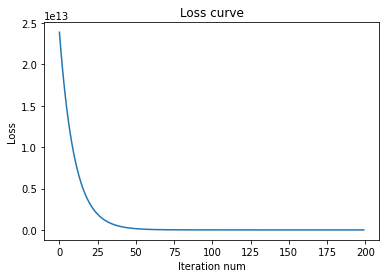

In [562]:
# Plot the loss curve
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [563]:
from sklearn.linear_model import LinearRegression

In [564]:
# Comparing with Sklearn Model
model = LinearRegression().fit(X, y)
pred = model.predict(X)

In [565]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, pred, squared=False) #rmse

30341.18798409545